In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=22a2408bbb51dfeb32e14b4d4dc13a66c88b757bbf839f852c01c3ac2596fc66
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.manifold import TSNE

from sklearn.linear_model import LinearRegression

import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




In [ ]:
boston_housing=pd.read_csv("BostonHousing.csv",header=0)

In [ ]:
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Figure 1** description: The dataset stored in the file "BostonHousing.csv" has been successfully loaded into a Pandas DataFrame named "housing." This initial step is crucial for understanding the structure and contents of the data. Subsequently, the head() method is employed to display the first five rows of the dataset, offering a preliminary glimpse into its composition.

In [ ]:
boston_housing.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
boston_housing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
boston_housing['rm'].index[boston_housing['rm'].apply(np.isnan)]

Int64Index([10, 35, 63, 96, 135], dtype='int64')

In [ ]:
boston_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Figure 2** Description: The describe() method has been applied to the "housing" DataFrame, offering a comprehensive statistical summary of the numerical columns within the dataset. This summary encompasses key statistical measures that provide valuable insights into the central tendency, dispersion, and distribution of the numerical features.
The count metric offers insights into data completeness by indicating the number of non-null values in each column. The mean serves as an arithmetic average, providing a measure of the central tendency of the data, while the standard deviation quantifies the spread or dispersion around the mean. Minimum and maximum values showcase the range of observed data, and the inclusion of percentiles (25th, 50th, and 75th) offers a detailed depiction of the data distribution.

At this point we have so far seen the structure of the overall data. We see that the 'rm' column has 5 null/NaN values which will need to be addressed. The types seem to have been inferred correctly as we see no object type columns meaning all columns contain values of same type

In [ ]:
boston_housing.median()

crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20800
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
b          391.44000
lstat       11.36000
medv        21.20000
dtype: float64

The mean and median of 'rm' are very similar so it could be a good try to replace the 5 missing values with either mean or median.

In [ ]:
# As mentioned in report, handling missing values
boston_housing['rm'].fillna(boston_housing['rm'].median(), inplace=True)


In [ ]:
boston_housing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# EDA
## Analyze any type of relationship within or between features

In [ ]:
target_variable = boston_housing.iloc[:, -1]
features = boston_housing.iloc[:, :-1]

In [ ]:
target_variable.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [ ]:
features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


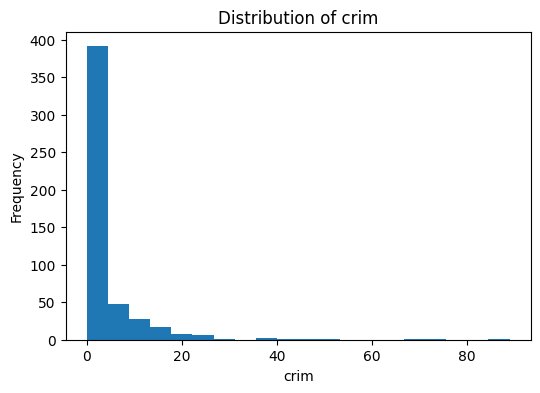

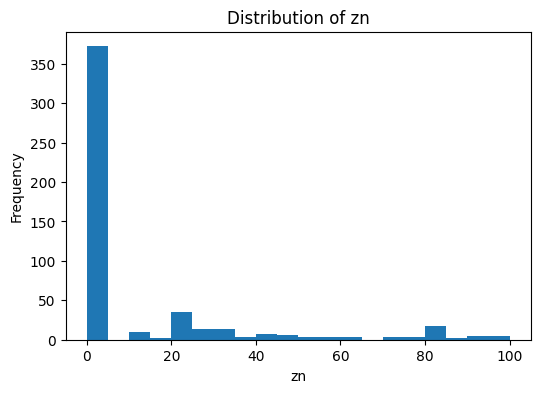

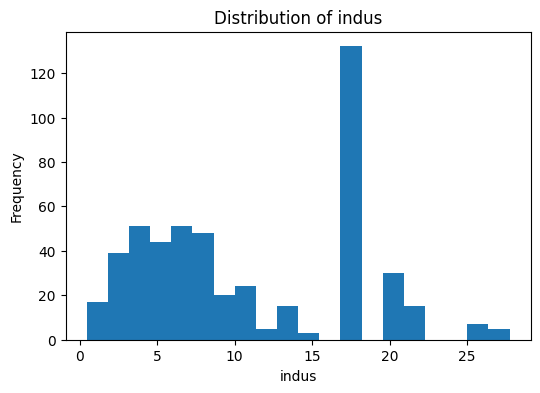

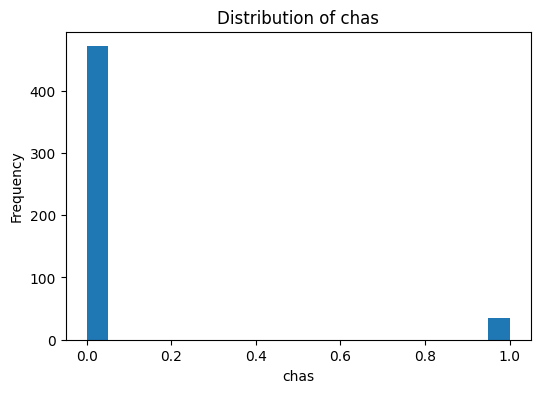

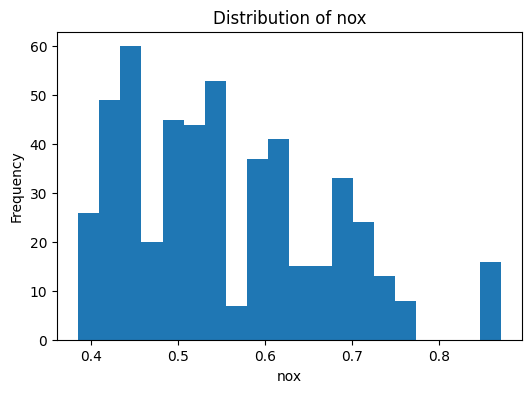

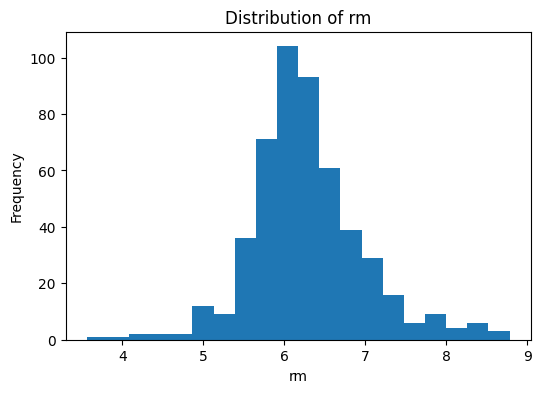

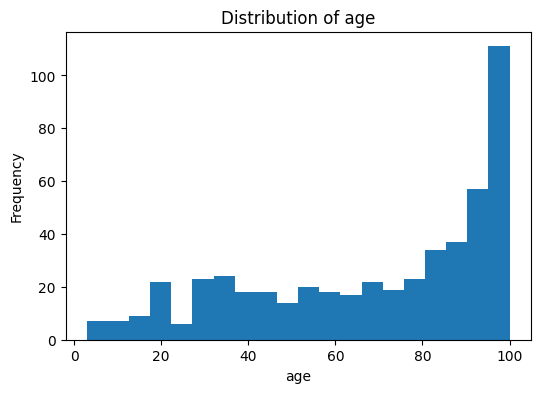

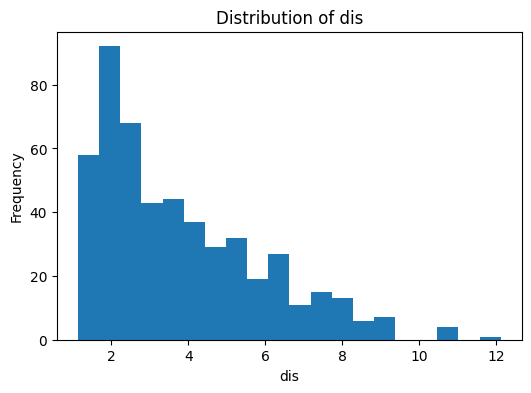

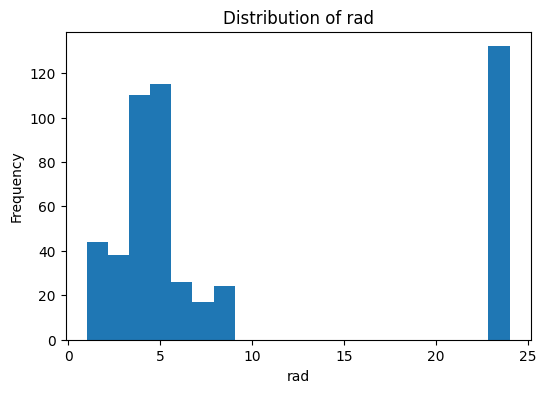

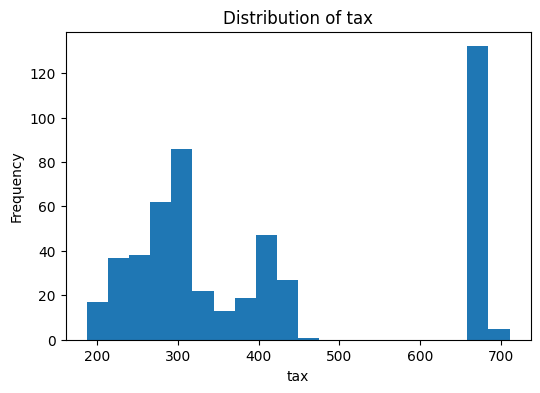

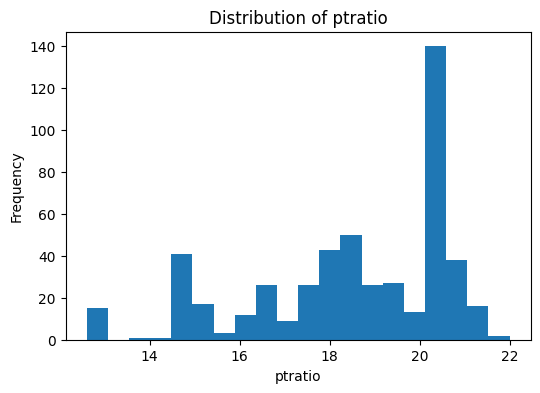

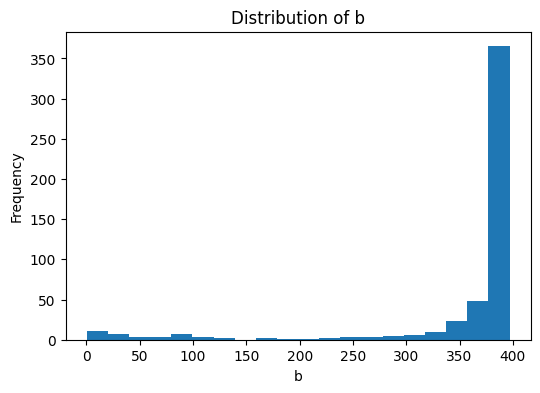

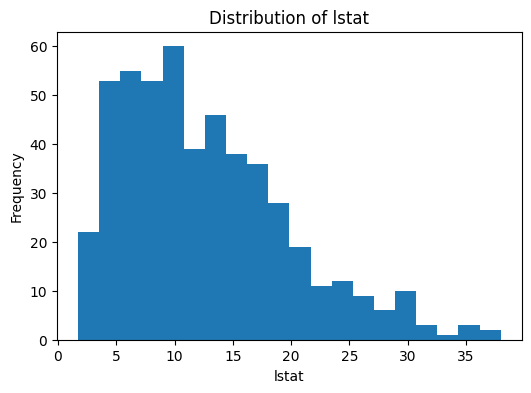

In [ ]:
# Plotting the distribution of each feature in separate graphs
for column in features.columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    plt.hist(features[column], bins=20)  # You can also use sns.distplot for more detailed plots
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

***Figure 3*** Description:
Distributions of all feature columns. Features 'crim,' 'zn,' and 'b,' exhibited high skewness. Chas is apparent now as a 'categorical' column

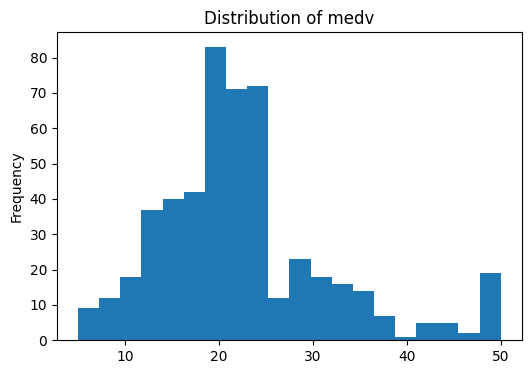

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.hist(target_variable, bins=20)  # You can also use sns.distplot for more detailed plots
plt.title("Distribution of medv")
plt.ylabel("Frequency")
plt.show()

## correlation analysis

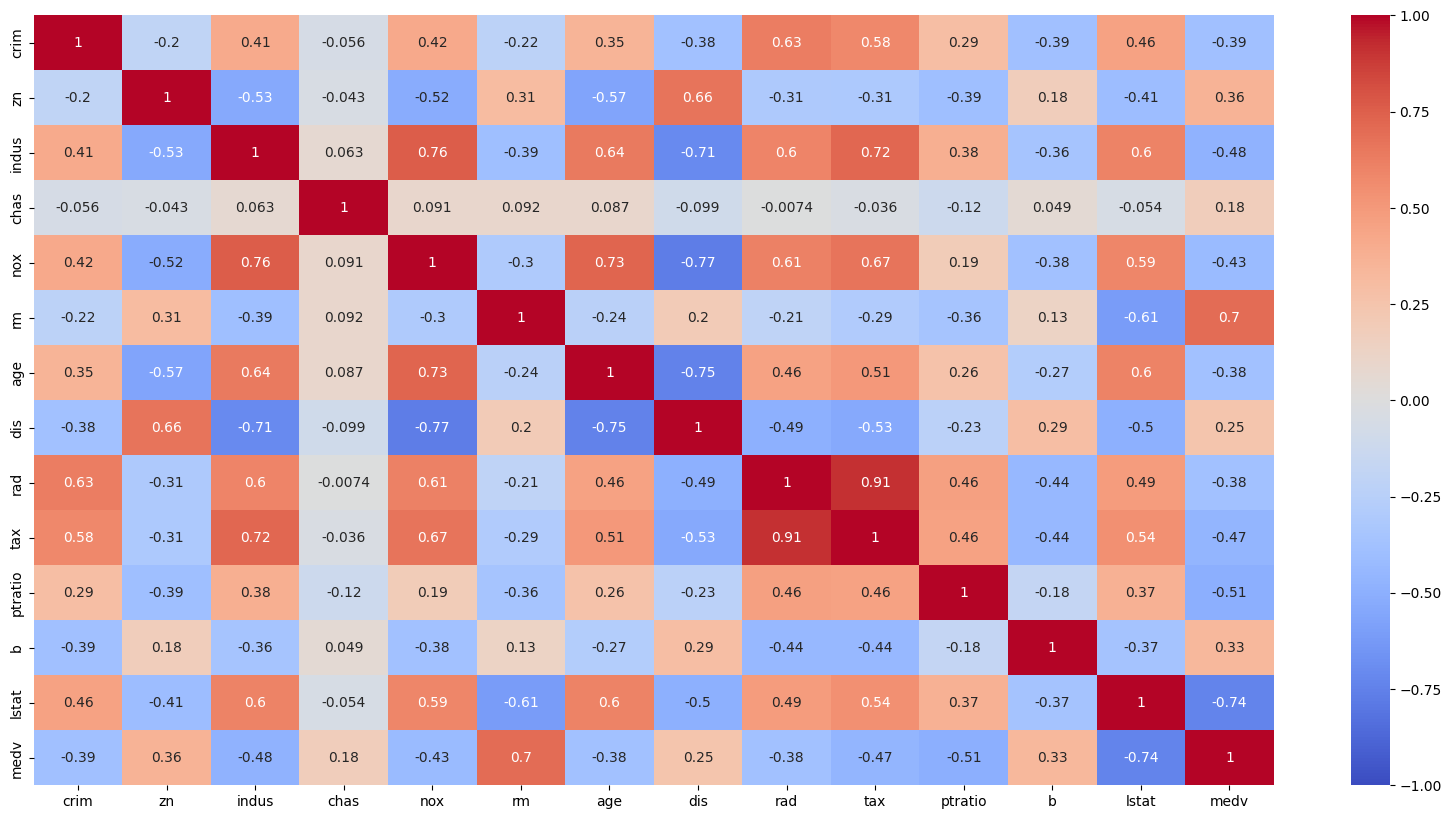

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston_housing.corr(),annot=True,cmap="coolwarm",center=0,vmin=-1,vmax=1);

'chas' doesnt seem to be correlated to anything (could possibly drop) however 'tax' and 'rad' seem to have very high correlation.

## Dimensionality Visual Analysis
### Concerns: 'chas' is categorical will try with and without

In [ ]:


features_withoutchas = features.drop('chas', axis=1)
x = StandardScaler().fit_transform(features_withoutchas)
x=pd.DataFrame(x)
x=pd.concat([x,features["chas"]],axis=1)
x=np.array(x)

pca = PCA(.95)

principalComponents = pca.fit_transform(x)



In [ ]:
pca.explained_variance_ratio_

array([0.5077823 , 0.11137644, 0.09813515, 0.06923388, 0.05511658,
       0.04456185, 0.03279204, 0.02296884, 0.01818564])

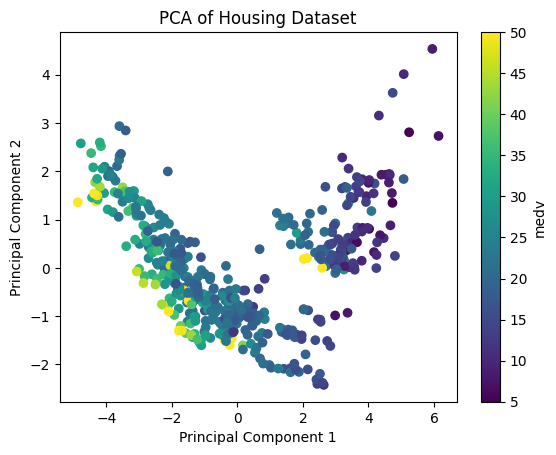

In [ ]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=boston_housing['medv'], cmap='viridis')
plt.colorbar(label='medv')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Dataset')
plt.show()

In [ ]:
x_nochas = StandardScaler().fit_transform(features_withoutchas)

principalComponents_nochas = pca.fit_transform(x_nochas)


In [ ]:
x_nochas.shape

(506, 12)

In [ ]:
pca.explained_variance_ratio_

array([0.5105062, 0.1118566])

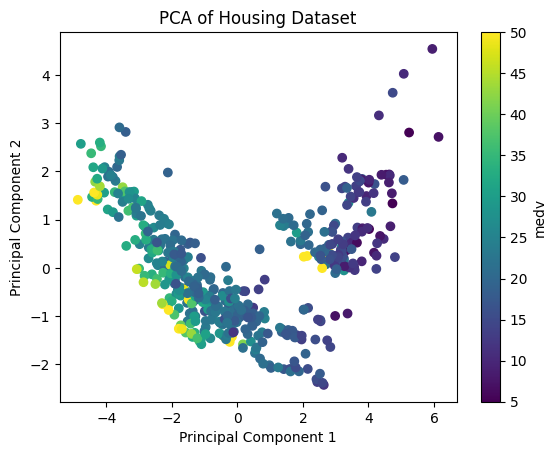

In [ ]:
plt.scatter(principalComponents_nochas[:, 0], principalComponents_nochas[:, 1], c=boston_housing['medv'], cmap='viridis')
plt.colorbar(label='medv')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Dataset')
plt.show()

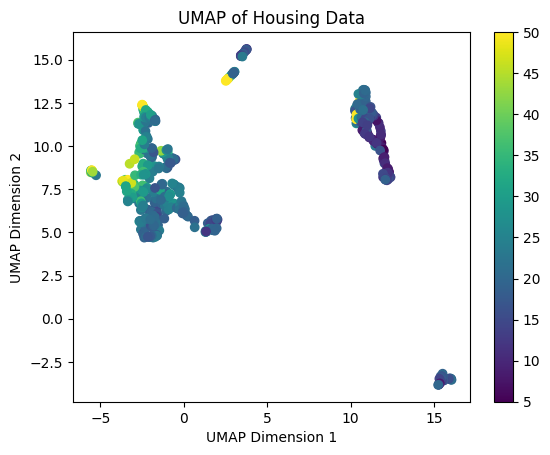

In [ ]:

umap_model = umap.UMAP(n_components=2)
housing_umap = umap_model.fit_transform(x)

# Scatter plot after UMAP
plt.scatter(housing_umap[:, 0], housing_umap[:, 1], c=boston_housing["medv"], cmap="viridis")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP of Housing Data")
plt.colorbar()
plt.show()

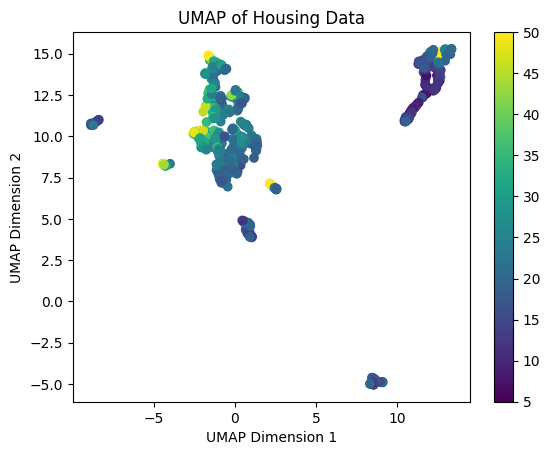

In [ ]:
housing_umap_nochas = umap_model.fit_transform(x_nochas)

# Scatter plot after UMAP
plt.scatter(housing_umap_nochas[:, 0], housing_umap_nochas[:, 1], c=boston_housing["medv"], cmap="viridis")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP of Housing Data")
plt.colorbar()
plt.show()

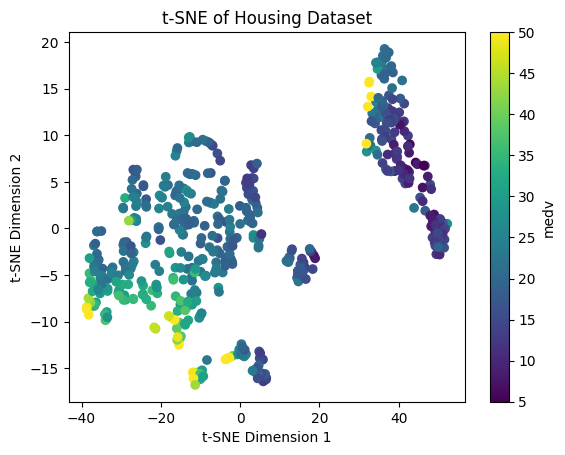

In [ ]:

# Applying t-SNE
tsne = TSNE(n_components=2,random_state=42)
housing_tsne = tsne.fit_transform(x)

# Plotting the t-SNE results
plt.scatter(housing_tsne[:, 0], housing_tsne[:, 1], c=boston_housing['medv'], cmap='viridis')
plt.colorbar(label='medv')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Housing Dataset')
plt.show()

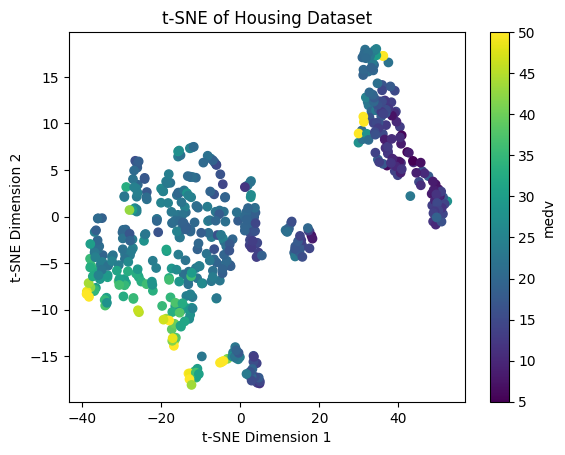

In [ ]:
housing_tsne_nochas = tsne.fit_transform(x_nochas)

# Plotting the t-SNE results
plt.scatter(housing_tsne_nochas[:, 0], housing_tsne_nochas[:, 1], c=boston_housing['medv'], cmap='viridis')
plt.colorbar(label='medv')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Housing Dataset')
plt.show()

 Tried each dimensionality reduction technique (including and excluding 'chas' feature) as a visualization tool and noticed that the first dimension (on x-axis) separates lower median value houses and higher median value houses quite well. Overall, it is still hard to interpret as is the case with dimensionality reduction techniques. Moving on, dataset will **NO LONGER USE ** 'chas' because of the overall low variance (info value) and 'rad' (high correlation with tax).

# Cross-Validation Strategy

Our group has concluded that the best cross-validation strategy would be to use some permutation of kfold cv. This is the case because our dataset is small, and we have decided to drop some features. kfold will allow us to avoid underfitting while mainting a balance of variance. Since our dataset is not a classification dataset, it was hard to justify stratified cv as a good strategy and instead we went for a simpler kfold.

# Model Building and Experimentation
## Start with simple linear model

In [ ]:
features=features.drop(['chas','rad'],axis=1)

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

linear_model_base=LinearRegression().fit(X_train,y_train)
train_pred=linear_model_base.predict(X_train)


mse = metrics.mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse) #mse**(0.5)
r2 = metrics.r2_score(y_train,train_pred)

print("Train MSE:", mse)
print("Train RMSE:", rmse)
print("Train R-Squared:", r2)

Train MSE: 22.925500186282807
Train RMSE: 4.788058080922036
Train R-Squared: 0.736104501783255


In [ ]:
## Test Metrics

y_hat=linear_model_base.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse) #mse**(0.5)
r2 = metrics.r2_score(y_test,y_hat)
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-Squared:", r2)

Test MSE: 27.304132213791554
Test RMSE: 5.22533560776641
Test R-Squared: 0.6276732082115685


Linear model is not the best at house price predicting

In [ ]:

linear_scores = cross_val_score(linear_model_base, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(-linear_scores)

[14.77055266 18.42757285 29.37484809 44.33827652 25.33293528 30.08698198
 20.01305631 18.81680525 12.64071601 37.98959581]


**Figure 4** Description: 10-Fold Cross-Validation MSE Results for the Linear Model

As shown above the cv scores are very inconsistent alluding to the idea that our data is inherently bad

In [ ]:
## first train simple regressor tree

DTregressor = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [ ]:
DTregressor.score(X_train,y_train) #R^2 of train test

1.0

In [ ]:
DTregressor.score(X_test,y_test) #R^2 of test set

0.8354849663551922

In [ ]:
DT_scores = cross_val_score(DTregressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(-DT_scores)

[14.75804878 19.33       20.38536585 51.85243902 77.79475    15.34175
 24.61225    26.36325    14.63225    28.874     ]


**Figure 5** Description: Default Decision Tree 10-Fold Cross-Validation MSE


In [ ]:
print("MSE DT test: ", metrics.mean_squared_error(y_test,(DTregressor.predict(X_test))))

MSE DT test:  12.06450980392157


In [ ]:
DTregressor.get_depth()

19

In [ ]:
DTregressor.get_n_leaves()

382

**Figure 6** Description: Two cells above show the size of the tree in order to fit the data with default settings.

Decision Tree results in much better r^2

In [ ]:
clf = GridSearchCV(DecisionTreeRegressor(random_state=42), {
    'max_depth': np.arange(1,20),
    'splitter': ['best','random'],
    'max_leaf_nodes': np.arange(2,400)
}, cv=10, return_train_score=False)
clf.fit(X_train, y_train)
DTgridcvresults=pd.DataFrame(clf.cv_results_)
DTgridcvresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002946,0.000519,0.001757,0.000341,1,2,best,"{'max_depth': 1, 'max_leaf_nodes': 2, 'splitte...",0.481488,0.478250,...,-0.062258,0.432421,0.578129,0.480628,0.321305,0.314384,0.265939,0.370771,0.169995,14293
1,0.002534,0.000319,0.001687,0.000381,1,2,random,"{'max_depth': 1, 'max_leaf_nodes': 2, 'splitte...",0.199750,0.320164,...,0.379752,0.301960,0.359946,0.460173,0.346446,0.314602,0.276435,0.337445,0.069463,14709
2,0.003098,0.000671,0.001698,0.000187,1,3,best,"{'max_depth': 1, 'max_leaf_nodes': 3, 'splitte...",0.481488,0.478250,...,-0.062258,0.432421,0.578129,0.480628,0.321305,0.314384,0.265939,0.370771,0.169995,14293
3,0.002428,0.000147,0.001600,0.000099,1,3,random,"{'max_depth': 1, 'max_leaf_nodes': 3, 'splitte...",0.199750,0.320164,...,0.379752,0.301960,0.359946,0.460173,0.346446,0.314602,0.276435,0.337445,0.069463,14709
4,0.002626,0.000120,0.001567,0.000080,1,4,best,"{'max_depth': 1, 'max_leaf_nodes': 4, 'splitte...",0.481488,0.478250,...,-0.062258,0.432421,0.578129,0.480628,0.321305,0.314384,0.265939,0.370771,0.169995,14293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15119,0.003694,0.000245,0.001813,0.000127,19,397,random,"{'max_depth': 19, 'max_leaf_nodes': 397, 'spli...",0.625847,0.633311,...,0.093058,0.717516,0.797762,0.765477,0.774008,0.766662,0.603880,0.647484,0.195975,11790
15120,0.005900,0.000662,0.002114,0.000238,19,398,best,"{'max_depth': 19, 'max_leaf_nodes': 398, 'spli...",0.769546,0.788930,...,0.307784,0.514119,0.856786,0.805820,0.606768,0.818686,0.577792,0.686742,0.169574,4592
15121,0.003580,0.000240,0.001819,0.000237,19,398,random,"{'max_depth': 19, 'max_leaf_nodes': 398, 'spli...",0.625847,0.633311,...,0.093058,0.717516,0.797762,0.765477,0.774008,0.766662,0.603880,0.647484,0.195975,11790
15122,0.006115,0.000437,0.002322,0.000196,19,399,best,"{'max_depth': 19, 'max_leaf_nodes': 399, 'spli...",0.769546,0.788930,...,0.307784,0.514119,0.856786,0.805820,0.606768,0.818686,0.577792,0.686742,0.169574,4592


In [ ]:
print(clf.best_estimator_,clf.best_score_,)

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=30, random_state=42,
                      splitter='random') 0.7109387186004412


***Figure 7*** Description: Parameters of the pruned/gridsearchCV decision tree that results in a smaller tree.

In [ ]:
bestDTpred=clf.predict(X_test)

print("Grid CV R^2 DT Test: ", metrics.r2_score(y_test,bestDTpred))
print("Grid CV MSE DT Test: ", metrics.mean_squared_error(y_test,bestDTpred))

Grid CV R^2 DT Test:  0.7841876323568392
Grid CV MSE DT Test:  15.82633737205945


***Figure 8*** Description: The grid search interestingly gave worse metric results but also created a simpler model. 7 depth, with 30 max leafs is much simpler than a tree with depth of 19 with 382 leaves

In [ ]:
clf.best_estimator_.feature_importances_

array([0.01484579, 0.00950113, 0.01994083, 0.02944437, 0.39039124,
       0.02280508, 0.01479665, 0.0353148 , 0.00894195, 0.01805693,
       0.43596124])

In [ ]:
pd.DataFrame({"Features":X_train.columns, "Importance":clf.best_estimator_.feature_importances_})

,Features,Importance
0,crim,0.014846
1,zn,0.009501
2,indus,0.019941
3,nox,0.029444
4,rm,0.390391
5,age,0.022805
6,dis,0.014797
7,tax,0.035315
8,ptratio,0.008942
9,b,0.018057


**Figure 9** Description: The feature importances show that rm and lstat are above and beyound more important than any other feature whil ptratio is the least important.

# Model Improvement Proposals

## Feature Selection
Remove worst feature indicated from above model and retrain (with cv) on the same Decision Tree Regressor

In [ ]:
features_nopratio=features.drop(["ptratio"],axis=1)

In [ ]:
X_trainfs, X_testfs, y_trainfs, y_testfs = train_test_split(features_nopratio, target_variable, test_size=0.2, random_state=42)

In [ ]:
fsDT=DecisionTreeRegressor(random_state=42).fit(X_trainfs,y_trainfs)
fsDT_pred=fsDT.predict(X_testfs)
print("Feature Selected DT Test R^2: ", metrics.r2_score(y_testfs,fsDT_pred))
print("Feature Selected DT Test MSE: ", metrics.mean_squared_error(y_testfs,fsDT_pred))

Feature Selected DT Test R^2:  0.8726371448806778
Feature Selected DT Test MSE:  9.34


***Figure 10*** Description: Evaluation of decision tree with effective feature selection shows how the model improved because of dropping a feature that was not important.

In [ ]:
fsDT.get_depth()

19

In [ ]:
fsDT.get_n_leaves()

380

In [ ]:
fsDT.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
DTfs_scores = cross_val_score(fsDT, X_trainfs, y_trainfs, scoring="neg_mean_squared_error", cv=10)
print(-DTfs_scores)

[21.43902439 19.36829268 20.56268293 47.00146341 63.647      16.3595
 22.9795     30.4295     18.68975    45.5055    ]


In [ ]:
clf_featureselected = GridSearchCV(DecisionTreeRegressor(random_state=42), {
    'max_depth': np.arange(1,20),
    'splitter': ['best','random'],
    'max_leaf_nodes': np.arange(2,400)
}, cv=10, return_train_score=False)
clf_featureselected.fit(X_trainfs, y_trainfs)
fsDTgridcvresults=pd.DataFrame(clf_featureselected.cv_results_)
fsDTgridcvresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003584,0.001091,0.002035,0.000516,1,2,best,"{'max_depth': 1, 'max_leaf_nodes': 2, 'splitte...",0.481488,0.478250,...,-0.062258,0.432421,0.578129,0.480628,0.321305,0.314384,0.265939,0.370771,0.169995,14293
1,0.002554,0.000134,0.001586,0.000076,1,2,random,"{'max_depth': 1, 'max_leaf_nodes': 2, 'splitte...",0.343289,0.400509,...,-0.136795,0.306554,0.636393,0.489161,0.217301,0.349282,0.253450,0.323280,0.190576,14709
2,0.002948,0.000340,0.001672,0.000163,1,3,best,"{'max_depth': 1, 'max_leaf_nodes': 3, 'splitte...",0.481488,0.478250,...,-0.062258,0.432421,0.578129,0.480628,0.321305,0.314384,0.265939,0.370771,0.169995,14293
3,0.002820,0.000333,0.001720,0.000153,1,3,random,"{'max_depth': 1, 'max_leaf_nodes': 3, 'splitte...",0.343289,0.400509,...,-0.136795,0.306554,0.636393,0.489161,0.217301,0.349282,0.253450,0.323280,0.190576,14709
4,0.003249,0.000285,0.001895,0.000210,1,4,best,"{'max_depth': 1, 'max_leaf_nodes': 4, 'splitte...",0.481488,0.478250,...,-0.062258,0.432421,0.578129,0.480628,0.321305,0.314384,0.265939,0.370771,0.169995,14293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15119,0.005266,0.000116,0.002676,0.000136,19,397,random,"{'max_depth': 19, 'max_leaf_nodes': 397, 'spli...",0.589592,0.616384,...,0.627644,0.831673,0.449294,0.860213,0.710862,0.764260,0.567230,0.680618,0.125028,5315
15120,0.008056,0.000257,0.003427,0.001193,19,398,best,"{'max_depth': 19, 'max_leaf_nodes': 398, 'spli...",0.729179,0.756993,...,0.190154,0.313870,0.809910,0.824421,0.409993,0.719903,0.579968,0.618916,0.223117,12883
15121,0.005317,0.000123,0.002811,0.000264,19,398,random,"{'max_depth': 19, 'max_leaf_nodes': 398, 'spli...",0.589592,0.616384,...,0.627644,0.831673,0.449294,0.860213,0.710862,0.764260,0.567230,0.680618,0.125028,5315
15122,0.008609,0.001572,0.003587,0.001114,19,399,best,"{'max_depth': 19, 'max_leaf_nodes': 399, 'spli...",0.729179,0.756993,...,0.190154,0.313870,0.809910,0.824421,0.409993,0.719903,0.579968,0.618916,0.223117,12883


In [ ]:
print(clf_featureselected.best_estimator_,clf_featureselected.best_score_,)

DecisionTreeRegressor(max_depth=11, max_leaf_nodes=31, random_state=42,
                      splitter='random') 0.7463900490732635


In [ ]:
bestDTpredfs=clf_featureselected.predict(X_testfs)

print("Grid CV R^2 DT Test: ", metrics.r2_score(y_testfs,bestDTpredfs))
print("Grid CV MSE DT Test: ", metrics.mean_squared_error(y_testfs,bestDTpredfs))

Grid CV R^2 DT Test:  0.6096079431798278
Grid CV MSE DT Test:  28.62892644236298


**Figure 11** Description: We see that grid search cv leads again to a worse model, but this time the metrics are much worse, so the smaller model may not make sense in this case and better to just use default parameters on the DecisionTreeRegressor with the dropped feature.

## Increased Model Complexity

The next proposal is to use a more complex model, specifcally an ensemble method of RandomForestRegressor. Use the same dataset as used in the first DTRegressor model and apply same cv approach.

In [ ]:
rf=RandomForestRegressor(random_state=42).fit(X_test,y_test)
RF_scores = cross_val_score(rf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(-RF_scores)

[10.56036073 12.15675563  8.72922778 30.5595068  21.45330145  9.0509244
 15.1831219   7.36906203  5.9624431  24.4072843 ]


***Figure 12*** Description: Cross-Validation MSE's help show that model is not overfitting and there is a good indication of learning happening.

In [ ]:
print("train set RF R^2: ", rf.score(X_train,y_train))
print("test set RF R^2: ", rf.score(X_test,y_test))

train set RF R^2:  0.8146972847430404
test set RF R^2:  0.9693605585307042


***Figure 13*** Description: While train R^2 was low, the test R^2 was very high!

In [ ]:
rfpred=rf.predict(X_test)
print("test set RF MSE: ", metrics.mean_squared_error(rfpred,y_test))

test set RF MSE:  2.2469061568627438


Right off the bat, the R^2 scores look great for default random forest regressor, and an exceptionally low MSE

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
clf_rf = GridSearchCV(RandomForestRegressor(random_state=42), {
    'max_depth': np.arange(1,20),
    'n_estimators': np.arange(50,150),
}, cv=10, return_train_score=False)
clf_rf.fit(X_train, y_train)
RFgridcvresults=pd.DataFrame(clf_rf.cv_results_)
RFgridcvresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079775,0.007883,0.003804,0.000236,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.625816,0.593433,0.533287,0.062886,0.584659,0.651468,0.592669,0.568430,0.600758,0.415280,0.522869,0.164990,1869
1,0.077003,0.002804,0.004029,0.000781,1,51,"{'max_depth': 1, 'n_estimators': 51}",0.627426,0.593923,0.531825,0.061034,0.583551,0.651884,0.592058,0.566803,0.597268,0.414418,0.522019,0.165435,1873
2,0.080201,0.004814,0.004173,0.000858,1,52,"{'max_depth': 1, 'n_estimators': 52}",0.628685,0.593992,0.531587,0.061955,0.581871,0.652514,0.593042,0.567609,0.593937,0.413396,0.521859,0.165231,1876
3,0.080021,0.002920,0.003809,0.000107,1,53,"{'max_depth': 1, 'n_estimators': 53}",0.629867,0.593611,0.535475,0.060735,0.580568,0.653734,0.592660,0.567225,0.594775,0.411697,0.522035,0.165830,1872
4,0.082514,0.004260,0.003922,0.000151,1,54,"{'max_depth': 1, 'n_estimators': 54}",0.630041,0.594096,0.534275,0.059118,0.583022,0.651999,0.591696,0.569645,0.591282,0.410747,0.521592,0.166195,1880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.575944,0.153833,0.009921,0.002792,19,145,"{'max_depth': 19, 'n_estimators': 145}",0.831714,0.861170,0.931798,0.540757,0.785568,0.907508,0.885825,0.887536,0.912552,0.671740,0.821617,0.118560,70
1896,0.602155,0.130535,0.010492,0.002550,19,146,"{'max_depth': 19, 'n_estimators': 146}",0.832015,0.861111,0.931322,0.541663,0.785727,0.907962,0.886140,0.887754,0.912750,0.674882,0.822133,0.117980,36
1897,0.484681,0.021206,0.008456,0.001287,19,147,"{'max_depth': 19, 'n_estimators': 147}",0.831395,0.860700,0.930497,0.540363,0.784714,0.907949,0.886037,0.888296,0.912106,0.674647,0.821670,0.118229,67
1898,0.659911,0.131709,0.011787,0.003024,19,148,"{'max_depth': 19, 'n_estimators': 148}",0.831926,0.861157,0.930059,0.539192,0.785429,0.908259,0.885549,0.888762,0.912360,0.674301,0.821699,0.118550,64


In [ ]:
print(clf_rf.best_estimator_,clf_rf.best_score_,)

RandomForestRegressor(max_depth=13, n_estimators=146, random_state=42) 0.8236368259793689


In [ ]:
bestRFpred=clf_rf.predict(X_test)

print("Grid CV R^2 Rf Test: ", metrics.r2_score(y_test,bestRFpred))
print("Grid CV MSE RF Test: ", metrics.mean_squared_error(y_test,bestRFpred))

Grid CV R^2 Rf Test:  0.8758813347061408
Grid CV MSE RF Test:  9.102091286808575


***Figure 14*** Description: Attempting to prune/adjust hyperparameters for Random Forest model shows that a simpler model can be achieved at the price of preditive power. However, in this case we can make the argument that depending on desired accuracy, this simpler model is fine enough in the case of saving computation time and resoruces.

Of all experiments, the best model performance was the default Random Forest Regressor with a R^2 of .969 and MSE of 2.247